# 数値解析 第1回 レポート

<div style="text-align: right;"><font size="4">
学籍番号: ■■■■■■■■<br>
氏名: 佐藤 瞭<br>
学科: 計数工学科<br>
<br>
連絡先: ■■■■■■■■■■<br>
2018/12/14 提出
</font></div><br>

# 計算機の環境

Microsoft Azureの仮想マシン上で計算を行った．

## OS
Linux
Ubuntu 16.04.4 LTS (GNU/Linux 4.15.0-1032-azure x86_64)

## CPU
Standard E4s v3 (4 vcpu 数、32 GB メモリ)

## ライブラリなどのversion

### Pythonのversion

In [1]:
import sys
print(sys.version)

3.6.5 (default, Jul  9 2018, 08:51:33) 
[GCC 5.4.0 20160609]


### Numpyのversion

In [2]:
import numpy as np
print(np.__version__)

1.14.5


## マシンイプシロン

In [3]:
sys.float_info.epsilon

2.220446049250313e-16

In [4]:
import numerical_analysis_01 as na_1

なお，ここでimportしているnumerical_analysis_01.pyはレポートの最後に添付してある．

In [5]:
import pandas as pd

np.random.seed(114514)

***

# 問1

絶対値が最大の固有値の推定値$\lambda$は，べき乗法で$\lambda = (x_k, Ax_k)$とすることで求まる$^{[1]}$．以下では$\lambda$の挙動についての考察をしていく．

In [6]:
A_1_1 = np.array([[1, 0, 0], [0, 5, -1], [0, 3, 0]])
A_1_2 = np.array([[1, 0, 0], [0, 0, -1], [0, 3, 0]])
init_vec = np.array([[1], [1], [1]])

## $A_1$について

In [7]:
res_1_1 = na_1.power_method(A_1_1, init_vec, 10)

In [8]:
eigs_1 = np.sort(
    np.linalg.eigvals(np.array([[1, 0, 0], [0, 5, -1], [0, 3, 0]])))[ : : -1]

In [9]:
df_1_1 = pd.DataFrame(
    {'推定最大固有値': res_1_1, '(絶対)誤差' : abs(res_1_1 - eigs_1[0])})
df_1_1.index += 1
df_1_1.index.name = 'k'

$A_1$の推定最大固有値と絶対誤差の挙動を以下に示す．

In [10]:
df_1_1

,推定最大固有値,(絶対)誤差
k,,
1,2.666667,1.636109e+00
2,4.038462,2.643141e-01
3,4.271889,3.088624e-02
4,4.298575,4.200427e-03
5,4.302140,6.358705e-04
6,4.302675,1.006060e-04
7,4.302759,1.617081e-05
8,4.302773,2.613225e-06
9,4.302775,4.230649e-07


1反復ごとに誤差がほぼ$10^{-1}$倍になっていくようすが観察できる．推定最大固有値は，正しい値に向かって収束しているように考えられる．

ここで，$A_1$の固有値を絶対値が大きい順に$\lambda_1, \lambda_2, \lambda_3$，対応する固有ベクトルを$z_1, z_2, z_3$として，
$\frac{\lambda_2} {\lambda_1}, \frac{\lambda_3} {\lambda_1}$の値をみてみる．

In [11]:
[eigs_1[1], eigs_1[2]] / eigs_1[0]

array([0.23240812, 0.1620406 ])

べき乗法の反復について，初期ベクトル$x_0 = (1, 1, 1)^T$について

$$
A^k x_0 = {\lambda_1}^k \left[
    z_1 +
        \left(
            \frac{\lambda_2}{\lambda_1} 
        \right) ^k z_2 +
        \left(
            \frac{\lambda_3}{\lambda_1} 
        \right) ^k z_3
    \right]
$$

が成り立つ．$\frac{\lambda_2} {\lambda_1}, \frac{\lambda_3} {\lambda_1}$の値が小さければ括弧の中の第2項，第3項が速く収束するので，最大固有値は速く求まる．
$A_1$では$\frac{\lambda_2} {\lambda_1}, \frac{\lambda_3} {\lambda_1} \simeq (0.23, 0.16)$であった．

## $A_2$について

In [12]:
res_1_2 = na_1.power_method(A_1_2, init_vec, 10)

In [13]:
eigs_2 = np.sort(
    np.linalg.eigvals(np.array([[1, 0, 0], [0, 0, -1], [0, 3, 0]])))
df_1_2 = pd.DataFrame(
    {'推定最大固有値(?)': res_1_2, '(絶対)誤差' : abs(res_1_2 - eigs_2[0])})
df_1_2.index += 1
df_1_2.index.name = 'k'

$A_2$に対するべき乗法の結果は以下のようになった．

In [14]:
df_1_2

,推定最大固有値(?),(絶対)誤差
k,,
1,1.000000,2.000000
2,-0.454545,1.790701
3,1.000000,2.000000
4,-0.582418,1.827351
5,1.000000,2.000000
6,-0.598027,1.832385
7,1.000000,2.000000
8,-0.599781,1.832958
9,1.000000,2.000000


偶数回と奇数回の反復で解が振動してしまっている．この原因を考察してみる．

$A_2$の固有値は以下のとおりである．

In [15]:
eigs_2

array([0.-1.73205081j, 0.+1.73205081j, 1.+0.j        ])

絶対値最大の固有値は虚部が非零の複素数で，共役な複素数も固有値になっているため，絶対値最大の固有値が2つ存在する．$\frac{\lambda_2} {\lambda_1}, \frac{\lambda_3} {\lambda_1}$は以下のとおり．

In [16]:
[eigs_2[1], eigs_2[2]] / eigs_2[0]

array([-1.+0.j        , -0.+0.57735027j])

$\frac{\lambda_2} {\lambda_1} = -1$となっている．べき乗法の反復に関する式

$$
A^k x_0 = {\lambda_1}^k \left[
    z_1 +
        \left(
            \frac{\lambda_2}{\lambda_1} 
        \right) ^k z_2 +
        \left(
            \frac{\lambda_3}{\lambda_1} 
        \right) ^k z_3
    \right]
$$

を思い出すと，$\left(\frac{\lambda_2} {\lambda_1}\right)^k = (-1)^k$は収束も発散もせず，1反復ごとに符号を変えながら振動することがわかる．そのため，$A_2$に対してべき乗法がうまくいかなかった原因は，絶対値最大の固有値が(虚部が非零の)複素数であることと解釈される．(ある複素数が固有値なら共役な複素数も固有値となるため，虚部が非零ならば$\frac{\lambda_2} {\lambda_1} = -1$となる．)

***
***

# 問2

__解答の作成の都合上，以下のような流れになっている:__
* CG法
    * c=2のときの観察・考察
    * c=20のときの観察・考察
* SOR法
    * c=2, 20をまとめた観察・考察

In [17]:
def set_equation(c, n):
    A = na_1.generate_matrix(c, n)
    b = np.random.rand(n, 1)
    init_x = np.zeros_like(b)
    true_x = np.linalg.solve(A, b)
    return A, b, init_x, true_x

## (i) CG法

In [18]:
A_2_1, b_1, init_x_1, true_x_1 = set_equation(2, 500)
A_2_2, b_2, init_x_2, true_x_2 = set_equation(20, 500)

### $c=2$のとき

#### 観察

$N = 200$として，右辺ベクトルを乱数，初期ベクトルを零ベクトルとし，50個の異なる方程式に対してCG法を適用した．以下のグラフはそのときの相対残差の挙動である．(縦軸は対数軸にしてある．)

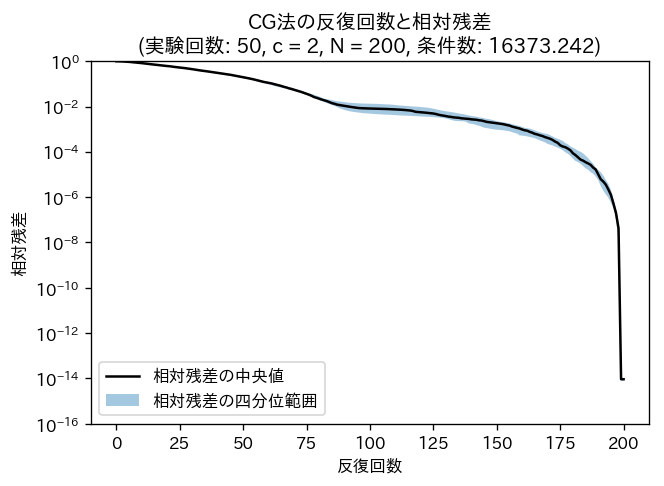

In [19]:
c = 2
n = 200
na_1.experiment(c, n, 'cg', 50, log_scale=True)

In [20]:
_, obj_2_1 = na_1.conjugate_gradient(
    A_2_1, b_1, init_x_1, true_x_1, abs_err=False, print_norm_p=True)

norm(p) = 63.65958628968319. (n_iter = 1)
norm(p) = 1070.3359426107331. (n_iter = 101)
norm(p) = 207.9931943456675. (n_iter = 201)
norm(p) = 13.20742058997006. (n_iter = 301)
norm(p) = 5.049202075122615. (n_iter = 401)
norm(p) = 3.5349758022000966e-14. (n_iter = 501)


#### 考察

【定理】
目的関数
$$
\phi(x) = \frac{1}{2}\left( x - x_{true}, A(x- x_{true})\right)
$$
および係数行列の条件数$\kappa = cond_2 (A)$
について，CG法の数値解は
$$
\phi(x_{k+1}) = 4 \left( \frac{\sqrt{\kappa - 1}}{\sqrt{\kappa + 1}} \right)^{2k}\phi(x_0)
$$
を満たす．($k = 0, 1, 2, ......$)

を検証してみる．この検証では$N = 500$として，1つの方程式を解いたときの結果のみを利用している．

最初と最後の20反復づつをみてみる．

In [21]:
df_2_1_head = pd.DataFrame({
    '目的関数値(c = 2)': obj_2_1[:20], 
    '目的関数値の(理論的)上限': [
        na_1.cg_objective_sup(
            A_2_1, k, init_x_1, true_x_1) for k in range(20)]})
df_2_1_head.index += 1
df_2_1_head.index.name = 'k'
df_2_1_head

,目的関数値(c = 2),目的関数値の(理論的)上限
k,,
1,2.447340e+06,9.790592e+06
2,2.445776e+06,9.668571e+06
3,2.441925e+06,9.548072e+06
4,2.435483e+06,9.429073e+06
5,2.424871e+06,9.311558e+06
6,2.411083e+06,9.195508e+06
7,2.397821e+06,9.080904e+06
8,2.381368e+06,8.967728e+06
9,2.362947e+06,8.855963e+06


In [22]:
df_2_1_tail = pd.DataFrame({
    '目的関数値(c = 2)': obj_2_1[-20:], 
    '目的関数値の(理論的)上限': [
        na_1.cg_objective_sup(A_2_1, k, init_x_1, true_x_1) for k in range(480, 500)]})
df_2_1_tail.index += 482
df_2_1_tail.index.name = 'k'
df_2_1_tail

,目的関数値(c = 2),目的関数値の(理論的)上限
k,,
482,8.497167e-03,23791.289128
483,6.318941e-03,23494.776984
484,4.767927e-03,23201.960287
485,3.407669e-03,22912.792980
486,2.447309e-03,22627.229581
487,1.863617e-03,22345.225175
488,1.449225e-03,22066.735405
489,1.176346e-03,21791.716468
490,8.812928e-04,21520.125108


たしかに，目的関数は(理論的)上限以下の値をとりつづけていることがわかる．

また，上の表の$k =500, 501$の部分をみると目的関数値が動かなくなっている．これは，CG法が500回の反復で収束し切ったことを意味していると解釈できる．したがって，「CG法は任意の初期ベクトルに対して(丸め誤差がなければ)高々n回で真の解に到達する」という定理と矛盾していないように考えられる．(目的関数値の$10^{-19}$は丸め誤差によるものと考えられる)

***

### $c=20$のとき
 
#### 観察

$c = 2$のときと同様に，$N = 200$として，右辺ベクトルを乱数，初期ベクトルを零ベクトルとし，50個の異なる方程式に対してCG法を適用した．以下のグラフはそのときの相対残差の挙動である．(縦軸は対数軸にしてある．)

/home/mewcket/00_reports/2A/numerical_analysis/numerical_analysis_01.py:43: RuntimeWarning: invalid value encountered in true_divide
  alpha = (np.dot(r.T, p) / np.dot(p.T, A_p))[0, 0]
/home/mewcket/.pyenv/versions/3.6.5/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


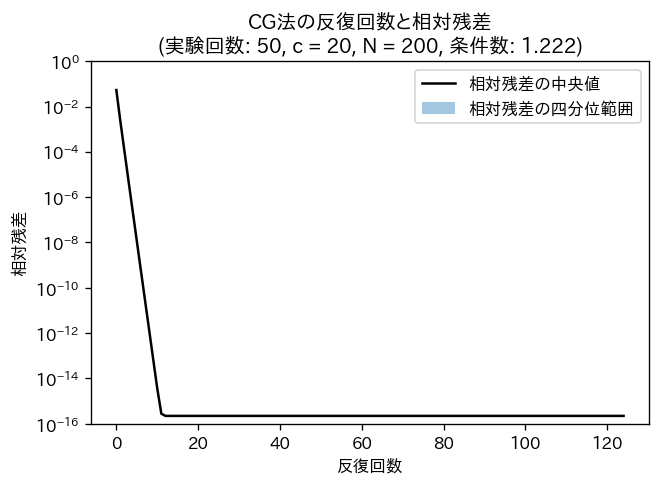

In [23]:
c = 20
na_1.experiment(c, n, 'cg', 50, log_scale=True)

途中で相対残差が小さくなりすぎたせいか，nanになってしまいグラフには最後まで表示されていない．200回反復する前に計算機での計算の限界を迎えたと思われる．

#### 考察

先ほどと同様に，目的関数
$$
\phi(x) = \frac{1}{2}\left( x - x_{true}, A(x- x_{true})\right)
$$
の値を理論的な上限値と比較してみる．先ほどと同様に，$N = 500$として，1つの方程式を解いたときの結果のみを利用している．　

In [24]:
_, obj_2_2 = na_1.conjugate_gradient(
    A_2_2, b_2, init_x_2, true_x_2, abs_err=False, print_norm_p=True)

norm(p) = 0.7577925656342827. (n_iter = 1)
norm(p) = 4.33178533193651e-131. (n_iter = 101)
norm(p) = nan. (n_iter = 201)


/home/mewcket/00_reports/2A/numerical_analysis/numerical_analysis_01.py:43: RuntimeWarning: invalid value encountered in true_divide
  alpha = (np.dot(r.T, p) / np.dot(p.T, A_p))[0, 0]


norm(p) = nan. (n_iter = 301)
norm(p) = nan. (n_iter = 401)
norm(p) = nan. (n_iter = 501)


丸め誤差によるものなのか，途中で要素が小さくなりすぎてnanになってしまったベクトルがある．先ほどの$N = 200$のときに途中で残差がnanになってしまったのはこのためと考えられる．

最初の20反復をみてみる．

In [25]:
df_2_2 = pd.DataFrame({
    '目的関数値(c = 20)': obj_2_2[:20], 
    '目的関数値の(理論的)上限': [
        na_1.cg_objective_sup(A_2_2, k, init_x_2, true_x_2) for k in range(20)]})
df_2_2.index += 1
df_2_2.index.name = 'k'
df_2_2

,目的関数値(c = 20),目的関数値の(理論的)上限
k,,
1,2.757406e-02,3.651199e+01
2,4.733995e-05,9.173562e-02
3,9.015426e-08,2.304838e-04
4,2.368880e-10,5.790859e-07
5,5.218642e-13,1.454941e-09
6,1.455258e-15,3.655510e-12
7,3.444351e-18,9.184394e-15
8,8.171552e-21,2.307560e-17
9,1.912463e-23,5.797697e-20


たしかに，目的関数値は理論的な上限以下で挙動している．

また，先ほどの相対残差のグラフをみると，$c = 2$のときに比べて早い段階で収束している．
ここで，$c = 2, 20$それぞれでの，$N = 500$での係数行列の条件数をみてみる．

$c = 2$のとき

In [26]:
np.linalg.cond(A_2_1)

101726.20699537714

$c = 20$のとき

In [27]:
np.linalg.cond(A_2_2)

1.2222173678072006

条件数に$10^5$倍ほどの開きがあることがわかる．条件数$\kappa$が1に近ければ$\left( \frac{\sqrt{\kappa - 1}}{\sqrt{\kappa + 1}} \right)$も小さくなるため，目的関数値の理論的な上限も小さくなる．条件数が小さくなることで実際の目的関数値も小さくなり，収束が早くなったという説明が考えられる．

条件数が大きい場合は，不完全Choleskey分解を行ったりすることで条件数を減らせる可能性がある．

***

## (ii) SOR法

つぎに，SOR法を適用する．CG法と同様に，$N = 200$として，右辺ベクトルを乱数，初期ベクトルを零ベクトルとし，50個の異なる方程式に対して適用した．以下のグラフはそのときの相対残差の挙動である．

また，加速パラメータ$\omega$を決めるにあたり，$c = 2$のときは
$$\omega = \frac{2}{1 + sin \left( \frac{1}{n+1}\right) \pi}$$
が最適である，という情報を得た$^{[2]}$ので，これを用いた．資料を追いきれず，$c = 20$のときでも最適かどうかわからなかったが，収束速度はそれなりに速かったので$c = 20$のときもこのパラメータを用いることにした．

#### 観察($c = 2, 20$をまとめて行った)

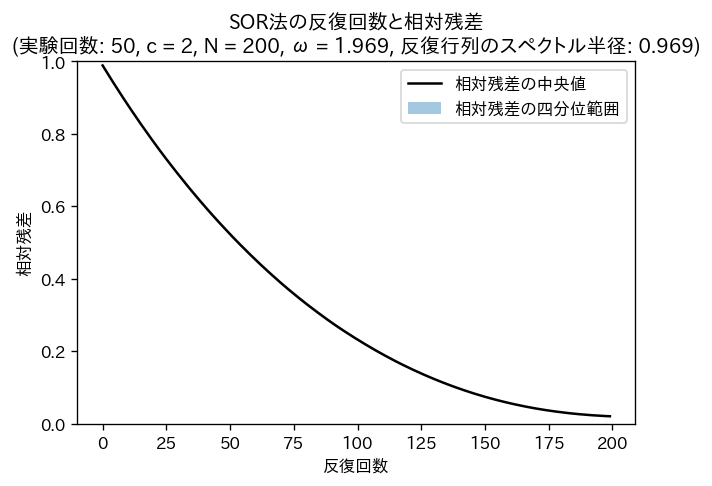

In [28]:
c = 2
n = 200
omega = 2 / (1 + np.sin(np.pi / (n + 1)))
na_1.experiment(
    c, n, 'sor', 50, omega=omega, max_iter=200)

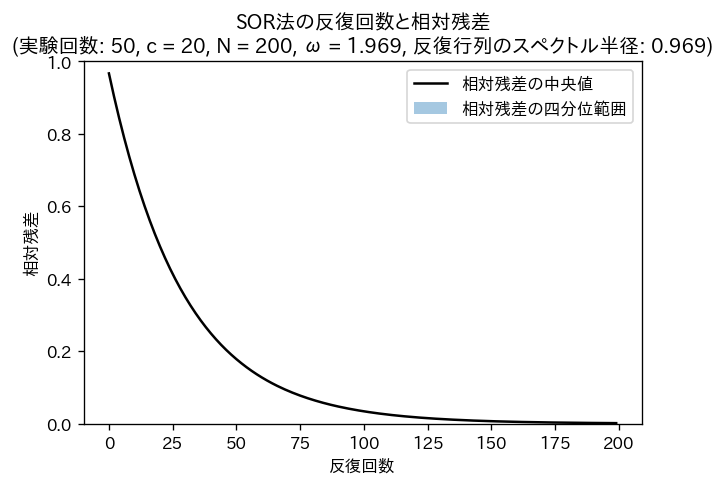

In [29]:
c = 20
na_1.experiment(
    c, n, 'sor', 50, omega=omega, max_iter=200)

どちらの場合にも相対誤差が単調に収束しているように見える．また，$c = 20$のほうが収束が速いように見える．

#### 考察

【定理】
収束の必要条件は$0 < \omega < 2$

【定理】
反復行列$H$のスペクトル半径が $\rho(H) < 1\Rightarrow$ 反復法は収束する

という2つの定理がここでも成り立っているか実験してみる．

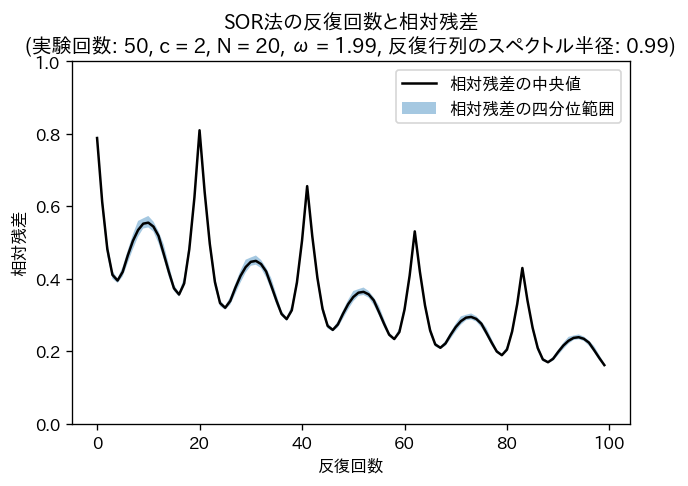

In [30]:
c = 2
n = 20
omega = 1.99
na_1.experiment(c, n, 'sor', 50, omega=omega, max_iter=100)

$\rho(H) < 1$を満たしており，収束することが予想される．実際，相対残差は減衰する振動をしながらゆるやかに0へ向かって収束している．

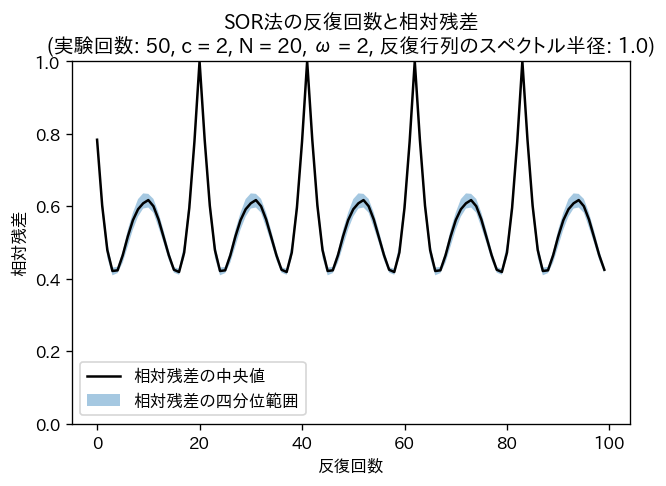

In [31]:
omega = 2
na_1.experiment(c, n, 'sor', 50, omega=omega, max_iter=100)

$\omega = 2$, $\rho(H) = 1$となり，収束の必要条件から外れる．相対残差は周期的な，減衰しない振動を繰りかえして収束しない．

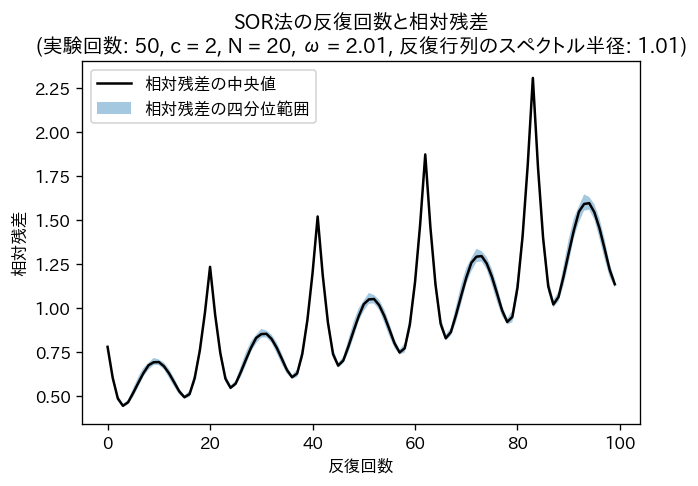

In [32]:
omega = 2.01
na_1.experiment(c, n, 'sor', 50, omega=omega, max_iter=100, set_ylim=False)

$\omega > 2$, $\rho(H) > 1$となる場合．見やすくするために縦軸のスケールを変えてある．収束の必要条件から外れている．相対残差は増幅する振動をしながら無限大に向かって発散する．

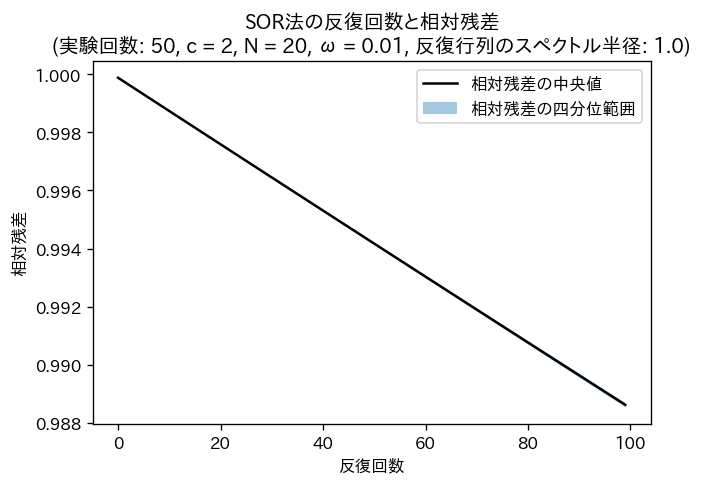

In [33]:
omega = 0.01
na_1.experiment(c, n, 'sor', 50, omega=omega, max_iter=100, set_ylim=False)

$0< \omega < 2$となる場合($\rho(H)$は丸められた値が表示されている)．見やすくするために縦軸のスケールを変えてある．収束の必要条件を満たしている．相対残差はゆるやかに0に向かって収束している．

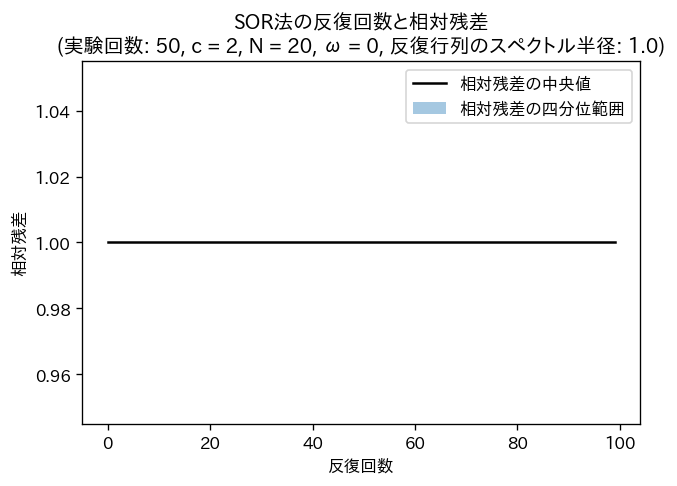

In [34]:
omega = 0
na_1.experiment(c, n, 'sor', 50, omega=omega, max_iter=100, set_ylim=False)

$\omega = 0$, $\rho(H) = 1$となる場合．見やすくするために縦軸のスケールを変えてある．収束の必要条件から外れている．相対残差は初期の値のまま一定で収束しない．

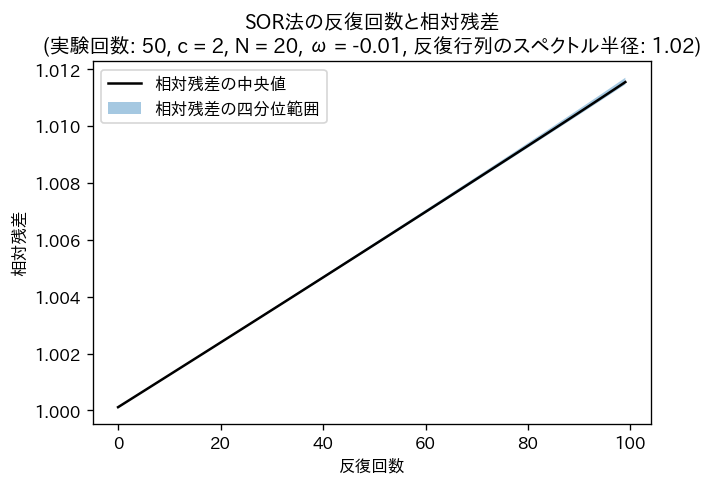

In [35]:
omega = -0.01
na_1.experiment(c, n, 'sor', 50, omega=omega, max_iter=100, set_ylim=False)

$\omega < 0$, $\rho(H) > 1$となる場合．見やすくするために縦軸のスケールを変えてある．収束の必要条件から外れている．相対残差は無限大に向かって発散している．

以上の結果から，今回の結果は

【定理】
収束の必要条件は$0 < \omega < 2$

【定理】
反復行列$H$のスペクトル半径が $\rho(H) < 1\Rightarrow$ 反復法は収束する

のふたつの定理に，たしかに従っていることが確認できた．

***
***

# 参考文献

[1] http&#58;//nkl.cc.u-tokyo.ac.jp/13n/Eigen.pdf p.12 2018/12/13 閲覧

[2] David S. Watkins (2004) "Fundamentals of Matrix Computation Second Edition" p.540